In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data=pd.read_csv('/content/data.csv',index_col='Month',parse_dates=True)
data

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<Axes: xlabel='Month'>

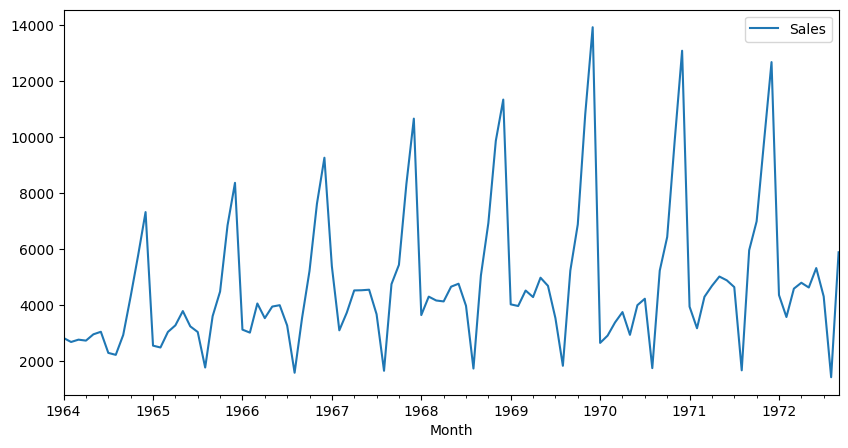

In [ ]:
data.plot(figsize=(10,5))

In [ ]:
scalar=MinMaxScaler()
traindata=data[:53]
testdata=data[52:]

In [ ]:
scaledtraindata=scalar.fit_transform(traindata)
scaledtestdata=scalar.fit_transform(testdata)

In [ ]:
n_input=12
n_features=1
generator=TimeseriesGenerator(scaledtraindata,scaledtraindata,length=12,batch_size=1)

In [ ]:
x,y=generator[0]
print(x.flatten(),y)

[0.13681428 0.12106191 0.13020489 0.12645957 0.15124477 0.16115885
 0.0781009  0.07038995 0.14860101 0.30050672 0.46166557 0.63218771] [[0.10663142]]


In [ ]:
x,y=generator[1]
print(x.flatten(),y)

[0.12106191 0.13020489 0.12645957 0.15124477 0.16115885 0.0781009
 0.07038995 0.14860101 0.30050672 0.46166557 0.63218771 0.10663142] [[0.09936109]]


In [ ]:
x,y=generator[2]
print(x.flatten(),y)

[0.13020489 0.12645957 0.15124477 0.16115885 0.0781009  0.07038995
 0.14860101 0.30050672 0.46166557 0.63218771 0.10663142 0.09936109] [[0.16060806]]


In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1,activation='tanh'))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Trained_history=model.fit(generator,epochs=20)

Epoch 1/20
41/41 [==============================] - 3s 15ms/step - loss: 0.0526
Epoch 2/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0459
Epoch 3/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0543
Epoch 4/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 5/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0466
Epoch 6/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0441
Epoch 7/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0395
Epoch 8/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0373
Epoch 9/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0273
Epoch 10/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0354
Epoch 11/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 12/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0170
Epoch 13/20
41/41 [=============================

In [ ]:
hist=Trained_history.history
hist.keys()

dict_keys(['loss'])

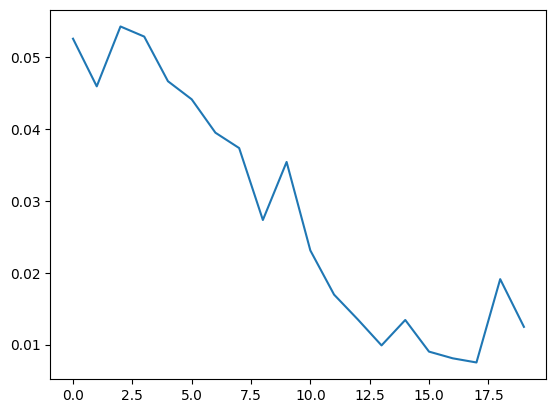

In [ ]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_prediction=[]
first_batch=scaledtraindata[-n_input:]
current_batch=first_batch.reshape(1,12,1)
for i in range(len(testdata)):
  current_pred=model.predict(current_batch)[0]
  print(current_pred)
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 211ms/step
[0.23079865]
1/1 [==============================] - 0s 25ms/step
[0.1992363]
1/1 [==============================] - 0s 22ms/step
[0.19245501]
1/1 [==============================] - 0s 22ms/step
[0.23704709]
1/1 [==============================] - 0s 22ms/step
[0.45292372]
1/1 [==============================] - 0s 23ms/step
[0.9167914]
1/1 [==============================] - 0s 23ms/step
[0.99535555]
1/1 [==============================] - 0s 23ms/step
[0.24483432]
1/1 [==============================] - 0s 21ms/step
[0.24053168]
1/1 [==============================] - 0s 23ms/step
[0.22550608]
1/1 [==============================] - 0s 23ms/step
[0.21652877]
1/1 [==============================] - 0s 22ms/step
[0.22929631]
1/1 [==============================] - 0s 23ms/step
[0.19477205]
1/1 [==============================] - 0s 24ms/step
[0.18589546]
1/1 [==============================] - 0s 22ms/step
[0.19977434]
1/1 [=====================

In [ ]:
true_pred=scalar.inverse_transform(test_prediction)
print(true_pred)

[[ 4298.67548104]
 [ 3904.05150351]
 [ 3819.26497285]
 [ 4376.79978035]
 [ 7075.90521008]
 [12875.64261729]
 [13857.93039757]
 [ 4474.16348742]
 [ 4420.36763215]
 [ 4232.50254546]
 [ 4120.25925267]
 [ 4279.89178564]
 [ 3848.23493846]
 [ 3737.25090967]
 [ 3910.77857046]
 [ 5125.68775573]
 [10192.25032073]
 [13682.83401316]
 [13857.38637465]
 [ 4618.07152236]
 [ 4321.8421008 ]
 [ 4127.6469721 ]
 [ 3996.14619957]
 [ 3955.81193057]
 [ 3830.76938078]
 [ 3783.22364086]
 [ 4141.62351705]
 [ 6463.17965019]
 [12318.18233347]
 [13867.26001799]
 [13857.82308346]
 [ 4761.41410881]
 [ 4399.43467361]
 [ 4194.53142259]
 [ 4058.37012495]
 [ 3979.27124211]
 [ 3916.83008018]
 [ 4058.54171574]
 [ 5020.49608055]
 [ 9107.06992102]
 [13361.94693917]
 [13884.92138666]
 [13855.10222363]
 [ 4926.74267352]
 [ 4537.30591725]
 [ 4322.31029586]
 [ 4179.82137825]
 [ 4096.92383675]
 [ 4046.09104329]
 [ 4079.86629626]
 [ 5678.52123642]
 [11233.8336181 ]
 [13777.65795296]]


In [ ]:
test_data_inverse=scalar.inverse_transform(scaledtestdata)
print(test_data_inverse)

[[ 4647.]
 [ 4753.]
 [ 3965.]
 [ 1723.]
 [ 5048.]
 [ 6922.]
 [ 9858.]
 [11331.]
 [ 4016.]
 [ 3957.]
 [ 4510.]
 [ 4276.]
 [ 4968.]
 [ 4677.]
 [ 3523.]
 [ 1821.]
 [ 5222.]
 [ 6872.]
 [10803.]
 [13916.]
 [ 2639.]
 [ 2899.]
 [ 3370.]
 [ 3740.]
 [ 2927.]
 [ 3986.]
 [ 4217.]
 [ 1738.]
 [ 5221.]
 [ 6424.]
 [ 9842.]
 [13076.]
 [ 3934.]
 [ 3162.]
 [ 4286.]
 [ 4676.]
 [ 5010.]
 [ 4874.]
 [ 4633.]
 [ 1659.]
 [ 5951.]
 [ 6981.]
 [ 9851.]
 [12670.]
 [ 4348.]
 [ 3564.]
 [ 4577.]
 [ 4788.]
 [ 4618.]
 [ 5312.]
 [ 4298.]
 [ 1413.]
 [ 5877.]]


In [ ]:
df=pd.DataFrame({'truevalue':test_data_inverse[:,0],'predictedvalue':true_pred[:,0]})
print(df)

    truevalue  predictedvalue
0      4647.0     4298.675481
1      4753.0     3904.051504
2      3965.0     3819.264973
3      1723.0     4376.799780
4      5048.0     7075.905210
5      6922.0    12875.642617
6      9858.0    13857.930398
7     11331.0     4474.163487
8      4016.0     4420.367632
9      3957.0     4232.502545
10     4510.0     4120.259253
11     4276.0     4279.891786
12     4968.0     3848.234938
13     4677.0     3737.250910
14     3523.0     3910.778570
15     1821.0     5125.687756
16     5222.0    10192.250321
17     6872.0    13682.834013
18    10803.0    13857.386375
19    13916.0     4618.071522
20     2639.0     4321.842101
21     2899.0     4127.646972
22     3370.0     3996.146200
23     3740.0     3955.811931
24     2927.0     3830.769381
25     3986.0     3783.223641
26     4217.0     4141.623517
27     1738.0     6463.179650
28     5221.0    12318.182333
29     6424.0    13867.260018
30     9842.0    13857.823083
31    13076.0     4761.414109
32     393

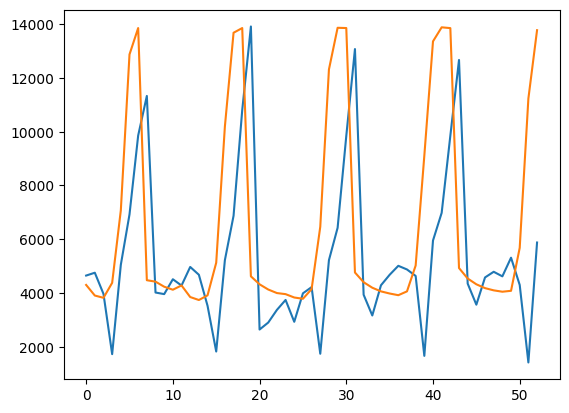

In [ ]:
plt.plot(df['truevalue'])
plt.plot(df['predictedvalue'])